In [2]:
%load_ext autoreload
%autoreload 2

# General settings to make plotting look nice
import matplotlib.font_manager
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['mathtext.fontset'] = 'cm'
rcParams['text.usetex'] = True
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['CMU Serif']
hops = {'histtype': 'step', 'density': True}

In [4]:
import pandas as pd
import numpy as np
import h5py as hd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

from src import loader, solver

In [6]:
# For the sake of speed, we set N to be 10% of the data set
# Strongly recommend using N=1.1e6, this is the full dataset
# Also, we put n_bins=60, probably should use 200 for best result

# Please ensure the data files are placed in the correct folder. 
# Due to github size limits we are unable to upload the data.
L = loader.LHCOLoader(
    N=300000,file_name="../data/bb3.h5",anomaly_frac=1.0
)

L.get_histograms_unbinned(symmetric=True)
print(L.histograms.shape)
L.plot_histogram_sample()

We didn't find the processed data files. Generating now...


KeyboardInterrupt: 

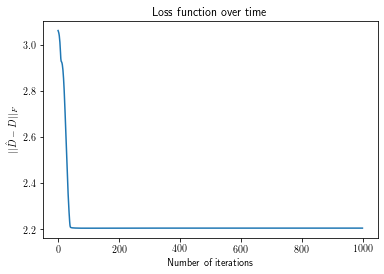

In [31]:
W, H, losses = solver.solve_fast_unbinned(L.histograms)
plt.plot(range(len(losses)), np.log10(losses))
plt.title("Loss function over time")
plt.xlabel("Number of iterations")
plt.ylabel("$||\hat{D} - D ||_{F}$")
plt.show()

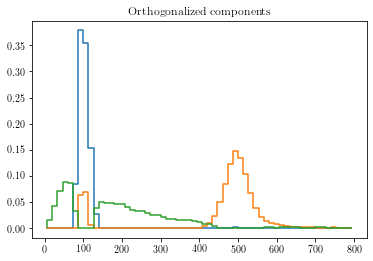

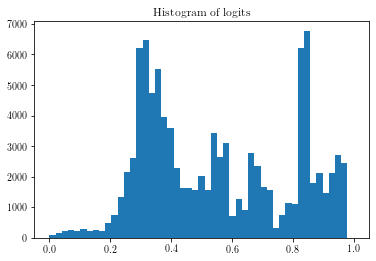

----- FRACTION = 1.0 -------
[[86676  4265]
 [ 4265  4794]]
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95     90941
         1.0       0.53      0.53      0.53      9059

    accuracy                           0.91    100000
   macro avg       0.74      0.74      0.74    100000
weighted avg       0.91      0.91      0.91    100000



/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


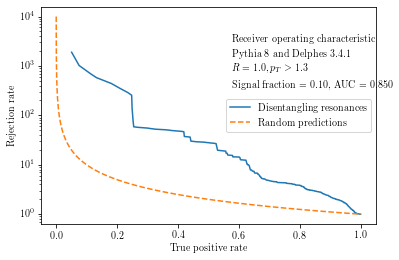

In [56]:
L.orthogonalize_components(W, plot=True)
# The reason that the AUC plot is so discontinuous... the histogram
# of logit values is very skewed. Also, we don't use the
# mixing fractions in the likelihood calculation. I can implement
# this if needed, but unclear if it will make a difference, except
# in the histogram of logits, and we should probably just transform
# that anyway...
tpr, fpr, auc = L.plot_ROC_curve(W)        

ax = plt.gca()
plt.plot(tpr, 1./fpr, label="Disentangling resonances")
plt.plot(np.logspace(-4, 0, 100), 1./np.logspace(-4, 0, 100), '--', label="Random predictions")
plt.xlabel("True positive rate")
plt.ylabel("Rejection rate")
plt.yscale("log")
plt.legend()
text = [     
    'Receiver operating characteristic',
    'Pythia 8 and Delphes 3.4.1',
    '$R=1.0, p_T > 1.3$',
    'Signal fraction = {0:.2f}, AUC = {1:.3f}'.format(0.1*L.frac, auc)
]
for i, s in enumerate(text):
    if i == 0:
        plt.text(0.57, 0.85-0.07*i, s, ha='left', va='center', transform=ax.transAxes, fontweight="bold") 
    else:
        plt.text(0.57, 0.85-0.07*i, s, ha='left', va='center', transform=ax.transAxes) 

plt.legend(loc="center right")
plt.savefig("figs/binned_log_roc_curve_{0}.pdf".format(L.frac), bbox_inches="tight")
plt.show()

In [64]:
n_trials = 10
fracs = np.logspace(-3, 0, 10)
aucs  = []
for ix, frac in enumerate(tqdm(fracs)):
    tmp = []
    for _ in range(n_trials):
        L = loader.LHCOLoader(N=100000,anomaly_frac=frac)
        L.get_histograms_unbinned(symmetric=True)
        W, H, losses = solver.solve_fast_unbinned(L.histograms)
        tpr, fpr, auc = L.plot_ROC_curve(W, verbose=False)
        tmp.append(auc)
    aucs.append([np.mean(tmp), np.std(tmp)])
#...and then you can plot AUCs however you would like :)

[[0.5271122669276418, 0.17544157344498804]]
[[0.5271122669276418, 0.17544157344498804], [0.48911196906727844, 0.0894532253370875]]
[[0.5271122669276418, 0.17544157344498804], [0.48911196906727844, 0.0894532253370875], [0.48034493583228477, 0.0973961227452052]]
[[0.5271122669276418, 0.17544157344498804], [0.48911196906727844, 0.0894532253370875], [0.48034493583228477, 0.0973961227452052], [0.45546889986059336, 0.044583387625760286]]
[[0.5271122669276418, 0.17544157344498804], [0.48911196906727844, 0.0894532253370875], [0.48034493583228477, 0.0973961227452052], [0.45546889986059336, 0.044583387625760286], [0.4784045248835607, 0.039000418786933895]]
[[0.5271122669276418, 0.17544157344498804], [0.48911196906727844, 0.0894532253370875], [0.48034493583228477, 0.0973961227452052], [0.45546889986059336, 0.044583387625760286], [0.4784045248835607, 0.039000418786933895], [0.4716270399803954, 0.11507439569050924]]
[[0.5271122669276418, 0.17544157344498804], [0.48911196906727844, 0.089453225337087

KeyboardInterrupt: 